In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
dataset = pd.read_csv("./Advertising.csv")
dataset.dropna(inplace=True)
dataset = dataset.drop("Unnamed: 0", axis = 1)

dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
dataset.shape

(200, 4)

In [16]:
dataset.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [55]:
X = dataset[['TV','Radio','Newspaper']]
y = dataset['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
coeff = pd.DataFrame(regressor.coef_, X.columns,  columns=['Coefficient'])  
coeff

,Coefficient
TV,0.044584
Radio,0.196497
Newspaper,-0.002781


In [62]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
18,11.3,10.057396
170,8.4,7.452281
107,8.7,7.019708
98,25.4,24.080297
177,11.7,12.017863
182,8.7,6.537939
5,7.2,12.782869
146,13.2,15.109746
12,9.2,10.769740
152,16.6,16.343580


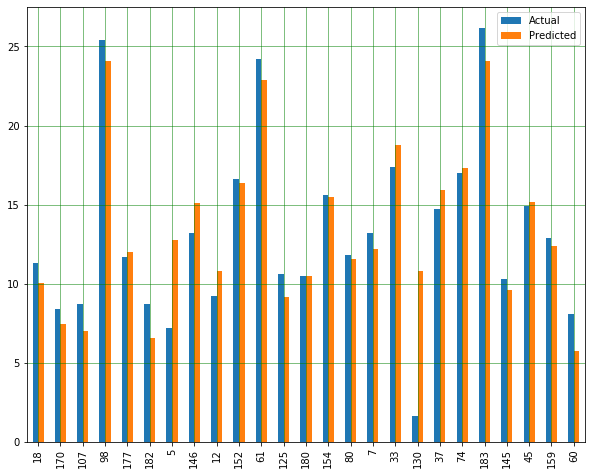

In [64]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3617813502090272
Mean Squared Error: 4.402118291449685
Root Mean Squared Error: 2.0981225634956804


In [69]:
confidence = regressor.score(X_test, y_test)
confidence

0.8601145185017868

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)
X_train2 = poly_regressor.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train2, y_train)

X_test2 = poly_regressor.fit_transform(X_test)
confidence = lr.score(X_test2, y_test)
confidence

0.9715371723181588

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=3)
X_train3 = poly_regressor.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train3, y_train)

X_test3 = poly_regressor.fit_transform(X_test)
confidence = lr.score(X_test3, y_test)
confidence

0.9786416802552714